In [74]:
from tensorflow import keras
import os
import tensorflow as tf
import PIL

DATASET_MAIN_ISL = os.path.join("dataset", "main", "isl")

CLASS_NAMES = [str(i) for i in range(0, 10)] + [
    chr(i) for i in range(ord("A"), ord("Z") + 1)
]
CLASS_NAMES

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [75]:
data = keras.utils.image_dataset_from_directory(
    os.path.join(DATASET_MAIN_ISL, "train"),
    class_names=CLASS_NAMES,
    label_mode="categorical",
)

data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
print(batch[0].shape)
print(batch)
print(batch[1])

Found 19020 files belonging to 36 classes.
(32, 256, 256, 3)
(array([[[[ 10.      ,  10.      ,  20.      ],
         [ 10.5     ,  10.5     ,  20.5     ],
         [ 11.5     ,  11.5     ,  21.5     ],
         ...,
         [ 16.75    ,  33.75    ,  23.25    ],
         [ 26.25    ,  45.25    ,  33.75    ],
         [ 31.      ,  51.      ,  39.      ]],

        [[  9.      ,   9.      ,  19.      ],
         [  9.5625  ,   9.5625  ,  19.5625  ],
         [ 10.6875  ,  10.6875  ,  20.6875  ],
         ...,
         [ 15.75    ,  32.75    ,  22.25    ],
         [ 25.25    ,  44.25    ,  32.75    ],
         [ 30.      ,  50.      ,  38.      ]],

        [[  7.      ,   7.      ,  17.      ],
         [  7.6875  ,   7.6875  ,  17.6875  ],
         [  9.0625  ,   9.0625  ,  19.0625  ],
         ...,
         [ 13.75    ,  30.75    ,  20.25    ],
         [ 23.25    ,  42.25    ,  30.75    ],
         [ 28.      ,  48.      ,  36.      ]],

        ...,

        [[ 12.25    ,  26.5   

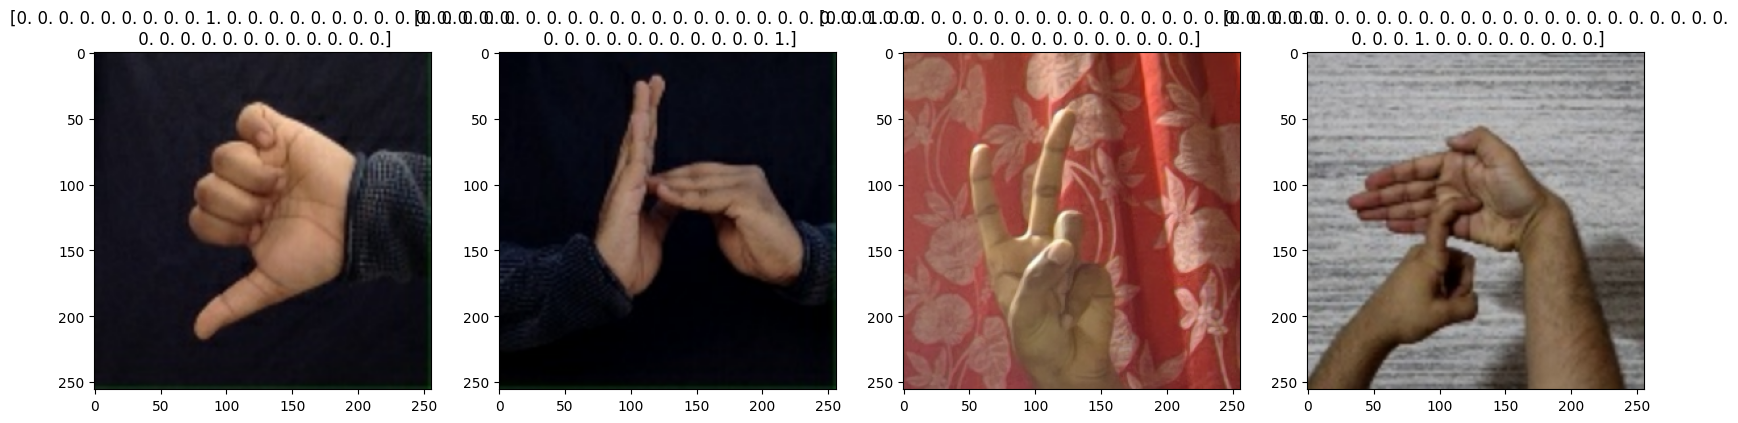

In [76]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype("uint8"))
    ax[idx].set_title(batch[1][idx])

In [77]:
# one_hot_array = lambda idx, size: [1 if i == idx else 0 for i in range(size)]
# print(one_hot_array(0, 10))

# data = data.map(lambda x, y: (x / 255.0, one_hot_array(y, len(CLASS_NAMES))))
training_data = data.take(200)

In [78]:
# Scaling the data

# IMG_SIZE = (180, 180)
# training_data = training_data.map(lambda x, y: (tf.image.resize(x, IMG_SIZE), y))

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [80]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(len(CLASS_NAMES), activation="softmax"))

model.compile("adam", loss="categorical_crossentropy", metrics=["acc"])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 60, 60, 16)        9232      
                                                                 
 flatten_6 (Flatten)         (None, 57600)            

In [81]:
LOG_DIR = "logs"

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=LOG_DIR)

In [82]:
hist = model.fit(training_data, epochs=4, callbacks=[tensorboard_callback])

Epoch 1/4


200/200 [==============================] - 41s 201ms/step - loss: 4.6194 - acc: 0.6719
Epoch 2/4
200/200 [==============================] - 40s 199ms/step - loss: 0.4555 - acc: 0.8889
Epoch 3/4
200/200 [==============================] - 40s 200ms/step - loss: 0.3996 - acc: 0.9112
Epoch 4/4
200/200 [==============================] - 40s 199ms/step - loss: 0.3144 - acc: 0.9356


In [87]:
# Load a custom image

img_path = "dataset/main/isl/test/0/0.jpg"
x = keras.preprocessing.image.load_img(img_path, target_size=(256, 256))
pred = model.predict(tf.expand_dims(x, 0))

print(pred)

pred.argmax()

1/1 [==============================] - 0s 17ms/step
[[0.03410736 0.03093146 0.03005993 0.03191933 0.03298178 0.02997388
  0.02860765 0.03024275 0.03438357 0.02827807 0.02858768 0.02490239
  0.03128349 0.02554525 0.02497984 0.02703815 0.03100359 0.02666553
  0.03173614 0.02484508 0.02724096 0.02393638 0.02436037 0.02628559
  0.02709491 0.02840512 0.02423262 0.02495784 0.02583298 0.0252308
  0.02628777 0.0294807  0.02637503 0.02548355 0.02463309 0.0220894 ]]


8